## Argo floats in an area

Let's use, as an example, data in the *Atlantic for the 11th November 2020. 
It is pre-downloaded in the ./Data folder, but you can download it from the Coriolis GDAC [See here for instructions on how to download the data](https://euroargodev.github.io/argoonlineschool/Lessons/L03_UsingArgoData/Chapter30_UsingArgoData_intro.html#data-used-in-the-argo-online-school)

First, import the libraries

In [11]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

and it is possible to get the WMO of all the platforms that measured during this month, together with its data acquisition center. Hence, we can download the netCDF files for each cycle if necessary:

In [14]:
WMOs=np.array([])
DACs=np.array([])
LONs=np.array([])
LATs=np.array([])
for iday in range(1,31):
    filein=f"./Data/202107-ArgoData/geo/atlantic_ocean/2020/11/202011{iday:02d}_prof.nc"
    DS=xr.open_dataset(filein)
    #look for the WMO and DAC for each float
    LONs=np.append(LONs,DS.LONGITUDE.values)
    LATs=np.append(LATs,DS.LATITUDE.values)
    DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
    WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)

#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]
LONs=LONs[indices]
LATs=LATs[indices]

In [15]:
print(f"During november 2020 {WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],500):
    print(f"{ip} WMO {WMOs[ip]} DAC {DACs[ip]}")

During november 2020 1170 Argo floats where active:
0 WMO 1901341.0 DAC CS
500 WMO 4902441.0 DAC ME
1000 WMO 6903250.0 DAC IF


In [16]:
indice=np.where((LATs>15) & (LATs<45) & (LONs<0) & (LONs>-20))
WMOs_area=WMOs[indice]
DACs_area=DACs[indice]

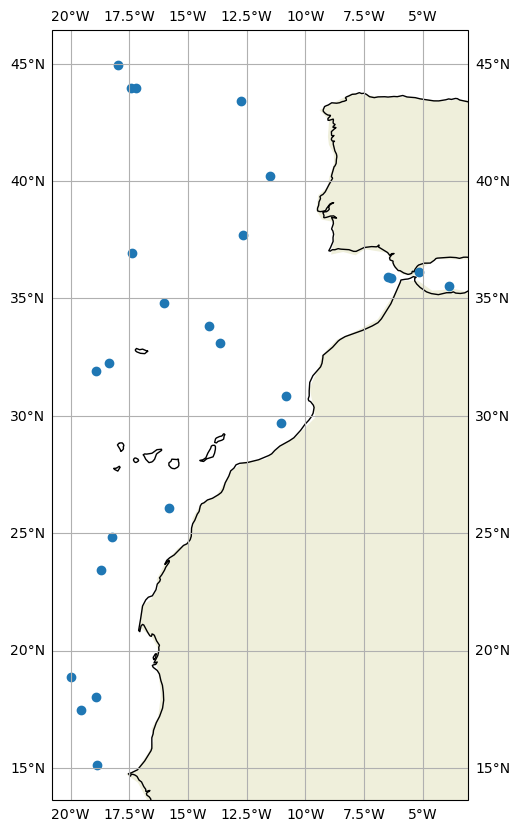

In [17]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(LONs[indice],LATs[indice],'o')
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

In [18]:
DACs_area=np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(DACs_area, 
                     'IF','coriolis'),'BO','bodc'),'AO','aoml'),
                     'HZ','csio'),'CS','csiro'),'IN','incois'),'JA','jma'),'KM','kma'),
                     'KO','kordi'),'ME','meds'),'NM','nmdis')

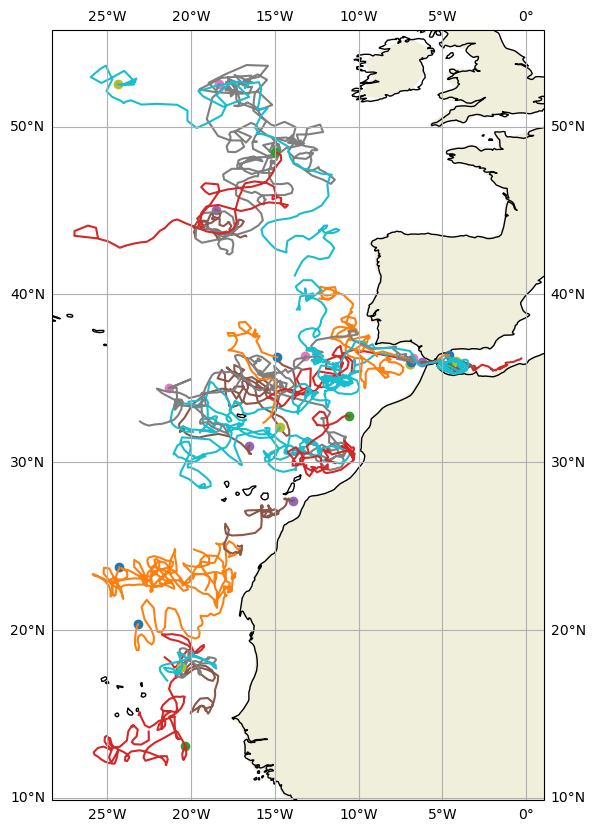

In [36]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

for ip in range(0,WMOs_area.size):
    filein=f"./Data/202107-ArgoData/dac/{DACs_area[ip]}/{WMOs_area[ip]:7.0f}/{WMOs_area[ip]:7.0f}_prof.nc"
    DS=xr.open_dataset(filein)
    ax.plot(DS.LONGITUDE[0],DS.LATITUDE[0],'o',DS.LONGITUDE,DS.LATITUDE,'-')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()


In [27]:
DS.LONGITUDE

<xarray.DataArray 'LONGITUDE' (N_PROF: 129)> Size: 1kB
[129 values with dtype=float64]
Dimensions without coordinates: N_PROF
Attributes:
    long_name:      Longitude of the station, best estimate
    standard_name:  longitude
    units:          degree_east
    valid_min:      -180.0
    valid_max:      180.0
    axis:           X